# Keras: Various MLP architectures for MNIST dataset

# Description:

# Objective:

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

from prettytable import PrettyTable

Using TensorFlow backend.


In [0]:
def plt_dynamic(x, vy, ty, ax, fig, title, colors = ['b']):
    
    '''
     This function is used to update the plots for each epoch and error
    '''
    ax.plot(x, vy, 'b', label = "Validation Loss")
    ax.plot(x, ty, 'r', label = "Train loss")
    plt.legend()
    plt.grid()
    plt.title(title)
    fig.canvas.draw()

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples : " + str(x_train.shape[0]) + " and each image is of shape ({}, {})".format(x_train.shape[1], x_train.shape[2]))
print("Number of test examples : " + str(x_test.shape[0]) + " and each image is of shape ({}, {})".format(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples : " + str(x_train.shape[0]) + " and each image is of shape ({})".format(x_train.shape[1]))
print("Number of test examples : " + str(x_test.shape[0]) + " and each image is of shape ({})".format(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [7]:
# An example data point

print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train / 255
x_test = x_test /255

In [9]:
# example data point after normlizing
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image : " + str(y_train[0]))

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : " + str(y_train[0]))

Class label of first image : 5
After converting the output into a vector : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# defining parameters
input_dim = x_train.shape[1]
output_dim = 10
batch_size = 128

In [0]:
def plot_epoch_crossentropy_loss(model, n_epoch, title):
    fig,ax = plt.subplots(1, 1)
    ax.set_xlabel('epoch')
    ax.set_ylabel('Categorical Crossentropy Loss')

    x = list(range(1, n_epoch+1))

    vy = model.history['val_loss']
    ty = model.history['loss']
    plt_dynamic(x, vy, ty, ax, fig, title)

In [0]:
class Mlp2hlayer():
    
    def __init__(self, n1, n2, n_epoch):
        self.activation = 'relu'
        self.optimizer = 'adam'
        self.n1 = n1
        self.n2 = n2
        self.n_epoch = n_epoch
        self.sigma1 = np.sqrt(2/self.n1)
        self.sigma2 = np.sqrt(2/self.n2)
        
    def weights_plot_after_train(self, model):
        
        w_after = model.get_weights()
        #Hidden layer 1 weights
        h1_w = w_after[0].flatten().reshape(-1, 1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        out_w = w_after[4].flatten().reshape(-1,1)
        
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 3, 1)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')

        plt.subplot(1, 3, 2)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')

        plt.subplot(1, 3, 3)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Output Layer ')
        plt.show()
        
    def model(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        
        # Defining
        model_2 = Sequential()
        model_2.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_2.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_2.add(Dense(output_dim, activation = "softmax"))
        
        print(model_2.summary())
        
        model_2.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_2_fit = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_2.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_2_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        self.weights_plot_after_train(model_2)
        
        return round(score[1]*100, 2)
      
    def model_with_drop_out(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        
        # Defining
        model_2 = Sequential()
        
        model_2.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_2.add(Dropout(0.5))
        
        model_2.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_2.add(Dropout(0.5))
        
        model_2.add(Dense(output_dim, activation = "softmax"))
        
        print(model_2.summary())
        
        model_2.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_2_fit = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_2.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_2_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        self.weights_plot_after_train(model_2)
        
        return round(score[1]*100, 2)
      
    def model_with_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        
        # Defining
        model_2 = Sequential()
        
        model_2.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_2.add(BatchNormalization())
        
        model_2.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_2.add(BatchNormalization())
        
        model_2.add(Dense(output_dim, activation = "softmax"))
        
        print(model_2.summary())
        
        model_2.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_2_fit = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_2.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_2_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        self.weights_plot_after_train(model_2)
        
        return round(score[1]*100, 2)
      
    def model_with_drop_out_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        
        # Defining
        model_2 = Sequential()
        
        model_2.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_2.add(BatchNormalization())
        model_2.add(Dropout(0.5))
        
        model_2.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_2.add(BatchNormalization())
        model_2.add(Dropout(0.5))
        
        model_2.add(Dense(output_dim, activation = "softmax"))
        
        print(model_2.summary())
        
        model_2.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_2_fit = model_2.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_2.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_2_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        self.weights_plot_after_train(model_2)
        
        return round(score[1]*100, 2)

In [0]:
# Instantiate the class
mlp2hlayer = Mlp2hlayer(512, 128, 100)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Test score: 0.13217799928017682
Test accuracy: 0.986


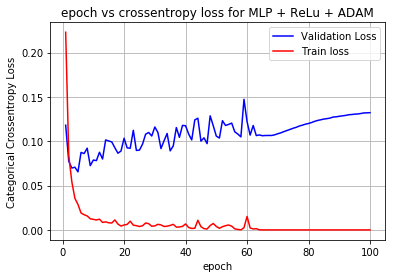

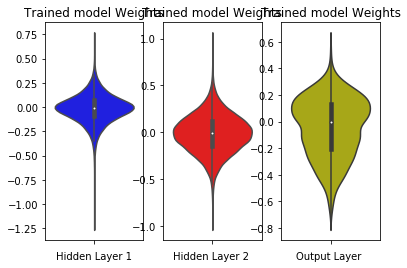

In [15]:
simple_2hlayer_acc = mlp2hlayer.model()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Test score: 0.08

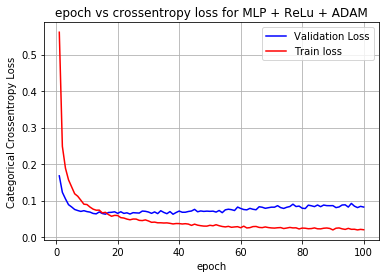

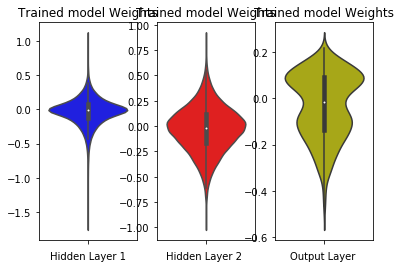

In [16]:
simple_with_drop_out_2hlayer_acc = mlp2hlayer.model_with_drop_out()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________
None
Test score: 0.08464546794290145
Test accuracy: 0.9851


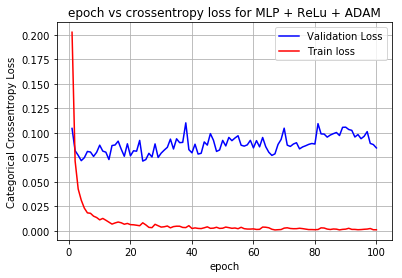

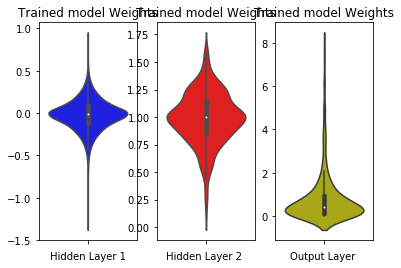

In [17]:
simple_with_batch_normalization_2hlayer_acc = mlp2hlayer.model_with_batch_normalization()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

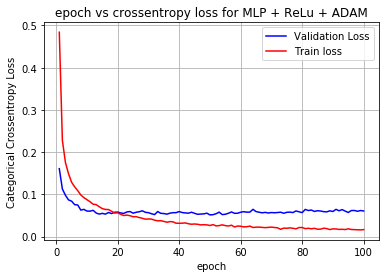

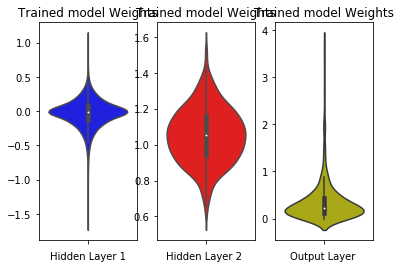

In [18]:
simple_with_drop_out_batch_normalization_2hlayer_acc = mlp2hlayer.model_with_drop_out_batch_normalization()

In [0]:
class Mlp3hlayer():
        
    def __init__(self, n1, n2, n3, n_epoch):
        self.activation = 'relu'
        self.optimizer = 'adam'
        self.n1 = n1
        self.n2 = n2
        self.n3 = n3
        self.n_epoch = n_epoch
        self.sigma1 = np.sqrt(2/self.n1)
        self.sigma2 = np.sqrt(2/self.n2)
        self.sigma3 = np.sqrt(2/self.n3)
        
    def weights_plot_after_train(self, model):
        
        w_after = model.get_weights()
        #Hidden layer 1 weights
        h1_w = w_after[0].flatten().reshape(-1, 1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        h3_w = w_after[4].flatten().reshape(-1,1)
        out_w = w_after[6].flatten().reshape(-1,1)
        
        
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 4, 1)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')

        plt.subplot(1, 4, 2)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        
        plt.subplot(1, 4, 3)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h3_w, color='b')
        plt.xlabel('Hidden Layer 3 ')

        plt.subplot(1, 4, 4)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Output Layer ')
        plt.show()
        
    def model(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_3 = Sequential()
        model_3.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_3.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_3.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_3.add(Dense(output_dim, activation = "softmax"))
        
        print(model_3.summary())
        
        model_3.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_3_fit = model_3.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_3.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_3_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_3)
        
        return round(score[1]*100, 2)
      
    def model_with_drop_out(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_3 = Sequential()
        
        model_3.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(output_dim, activation = "softmax"))
        
        print(model_3.summary())
        
        model_3.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_3_fit = model_3.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_3.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_3_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_3)
        
        return round(score[1]*100, 2)
      
    def model_with_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_3 = Sequential()
        
        model_3.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_3.add(BatchNormalization())
        
        model_3.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_3.add(BatchNormalization())
        
        model_3.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_3.add(BatchNormalization())
        
        model_3.add(Dense(output_dim, activation = "softmax"))
        
        print(model_3.summary())
        
        model_3.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_3_fit = model_3.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_3.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_3_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_3)
        
        return round(score[1]*100, 2)
    
    def model_with_drop_out_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_3 = Sequential()
        
        model_3.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_3.add(BatchNormalization())
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_3.add(BatchNormalization())
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_3.add(BatchNormalization())
        model_3.add(Dropout(0.5))
        
        model_3.add(Dense(output_dim, activation = "softmax"))
        
        print(model_3.summary())
        
        model_3.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_3_fit = model_3.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_3.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_3_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_3)
        
        return round(score[1]*100, 2)

In [0]:
mlp3hlayer = Mlp3hlayer(392, 196, 98, 100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_14 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_15 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________
None
Test score: 0.1548791318602462
Test accuracy: 0.9809


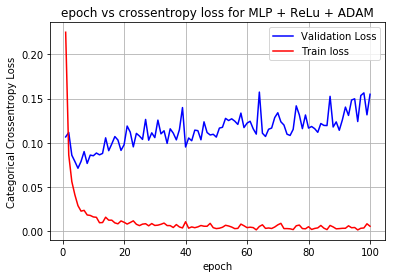

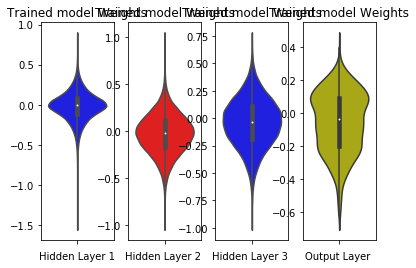

In [21]:
model_3hlayer_acc = mlp3hlayer.model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_5 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_6 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 98)                19306     
_________________________________________________________________
dropout_7 (Dropout)          (None, 98)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                990       
Total para

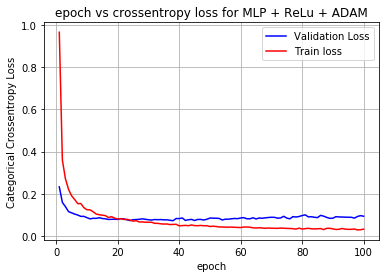

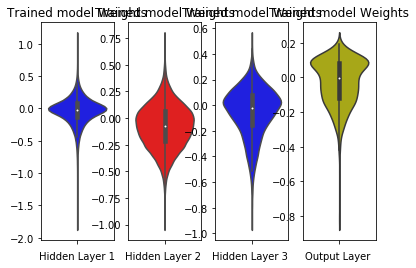

In [22]:
model_with_drop_out_3hlayer_acc = mlp3hlayer.model_with_drop_out()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_5 (Batch (None, 392)               1568      
_________________________________________________________________
dense_22 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_6 (Batch (None, 196)               784       
_________________________________________________________________
dense_23 (Dense)             (None, 98)                19306     
_________________________________________________________________
batch_normalization_7 (Batch (None, 98)                392       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                990       
Total para

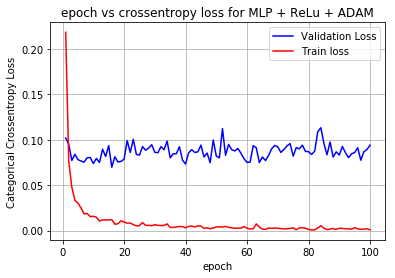

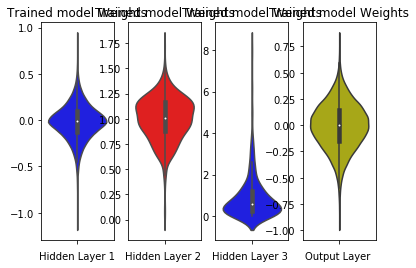

In [23]:
model_with_batch_normalization_3hlayer_acc = mlp3hlayer.model_with_batch_normalization()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_8 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_8 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_9 (Batch (None, 196)               784       
_________________________________________________________________
dropout_9 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 98)                19306     
__________

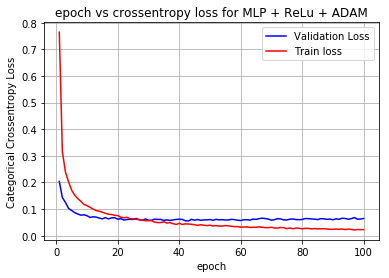

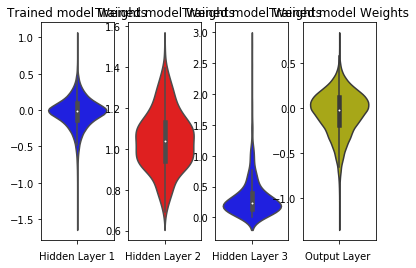

In [24]:
model_with_drop_out_batch_normalization_3hlayer_acc = mlp3hlayer.model_with_drop_out_batch_normalization()

In [0]:
class Mlp5hlayer():

    def __init__(self, n1, n2, n3, n4, n5, n_epoch):
        self.activation = 'relu'
        self.optimizer = 'adam'
        self.n1 = n1
        self.n2 = n2
        self.n3 = n3
        self.n4 = n4
        self.n5 = n5
        self.n_epoch = n_epoch
        self.sigma1 = np.sqrt(2/self.n1)
        self.sigma2 = np.sqrt(2/self.n2)
        self.sigma3 = np.sqrt(2/self.n3)
        self.sigma4 = np.sqrt(2/self.n4)
        self.sigma5 = np.sqrt(2/self.n5)
        
    def weights_plot_after_train(self, model):
        
        w_after = model.get_weights()
        #Hidden layer 1 weights
        h1_w = w_after[0].flatten().reshape(-1, 1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        h3_w = w_after[4].flatten().reshape(-1,1)
        h4_w = w_after[6].flatten().reshape(-1,1)
        h5_w = w_after[8].flatten().reshape(-1,1)
        out_w = w_after[10].flatten().reshape(-1,1)
        
        
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 6, 1)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')

        plt.subplot(1, 6, 2)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        
        plt.subplot(1, 6, 3)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h3_w, color='b')
        plt.xlabel('Hidden Layer 3 ')
        
        plt.subplot(1, 6, 4)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h4_w, color='r')
        plt.xlabel('Hidden Layer 4 ')
        
        plt.subplot(1, 6, 5)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=h5_w, color='b')
        plt.xlabel('Hidden Layer 5 ')

        plt.subplot(1, 6, 6)
        plt.title("Trained model Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Output Layer ')
        plt.show()

        
    def model(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_5 = Sequential()
        model_5.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_5.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_5.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_5.add(Dense(self.n4, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma4, seed = None)))
        model_5.add(Dense(self.n5, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma5, seed = None)))
        model_5.add(Dense(output_dim, activation = "softmax"))
        
        print(model_5.summary())
        
        model_5.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_5_fit = model_5.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_5.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_5_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_5)
        
        return round(score[1]*100, 2)
      
    def model_with_drop_out(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_5 = Sequential()
        
        model_5.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n4, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma4, seed = None)))
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n5, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma5, seed = None)))
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(output_dim, activation = "softmax"))
        
        print(model_5.summary())
        
        model_5.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_5_fit = model_5.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_5.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_5_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_5)
        
        return round(score[1]*100, 2)
      
    def model_with_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_5 = Sequential()
        
        model_5.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_5.add(BatchNormalization())
        
        model_5.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_5.add(BatchNormalization())
        
        model_5.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_5.add(BatchNormalization())
        
        model_5.add(Dense(self.n4, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma4, seed = None)))
        model_5.add(BatchNormalization())
        
        model_5.add(Dense(self.n5, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma5, seed = None)))
        model_5.add(BatchNormalization())
        
        model_5.add(Dense(output_dim, activation = "softmax"))
        
        print(model_5.summary())
        
        model_5.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_5_fit = model_5.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_5.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_5_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_5)
        
        return round(score[1]*100, 2)
      
    def model_with_drop_out_batch_normalization(self):
        '''
         This function is to define the model and compile for two hidden layers
        '''
        # Defining
        model_5 = Sequential()
        
        model_5.add(Dense(self.n1, activation = self.activation, input_shape = (input_dim,) , kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma1, seed = None)))
        model_5.add(BatchNormalization())
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n2, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma2, seed = None)))
        model_5.add(BatchNormalization())
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n3, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma3, seed = None)))
        model_5.add(BatchNormalization())
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n4, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma4, seed = None)))
        model_5.add(BatchNormalization())
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(self.n5, activation = self.activation, kernel_initializer = RandomNormal(mean = 0.0, stddev = self.sigma5, seed = None)))
        model_5.add(BatchNormalization())
        model_5.add(Dropout(0.5))
        
        model_5.add(Dense(output_dim, activation = "softmax"))
        
        print(model_5.summary())
        
        model_5.compile(optimizer = self.optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        model_5_fit = model_5.fit(x_train, y_train, batch_size = batch_size, epochs = self.n_epoch, verbose = 0, validation_data = (x_test, y_test))
        
        # Validation
        score = model_5.evaluate(x_test, y_test, verbose = 0)
        print('Test score:', score[0]) 
        print('Test accuracy:', score[1])
        
        plot_epoch_crossentropy_loss(model_5_fit, self.n_epoch, "epoch vs crossentropy loss for MLP + ReLu + ADAM")
        
        self.weights_plot_after_train(model_5)
        
        return round(score[1]*100, 2)

In [0]:
mlp5hlayer = Mlp5hlayer(392, 196, 98, 49, 24, 100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_30 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_31 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_32 (Dense)             (None, 49)                4851      
_________________________________________________________________
dense_33 (Dense)             (None, 24)                1200      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                250       
Total params: 410,355
Trainable params: 410,355
Non-trainable params: 0
_________________________________________________________________
None

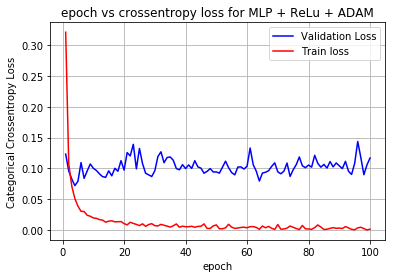

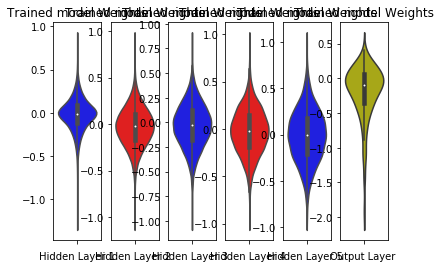

In [27]:
model_5hlayer_acc = mlp5hlayer.model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_11 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 196)               77028     
_________________________________________________________________
dropout_12 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 98)                19306     
_________________________________________________________________
dropout_13 (Dropout)         (None, 98)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 49)                4851      
__________

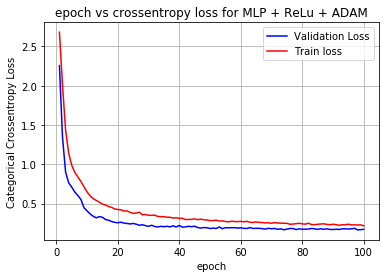

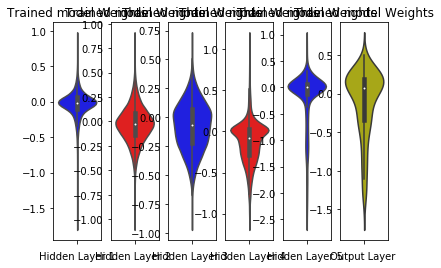

In [28]:
model_with_drop_out_5hlayer_acc = mlp5hlayer.model_with_drop_out()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_11 (Batc (None, 392)               1568      
_________________________________________________________________
dense_42 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_12 (Batc (None, 196)               784       
_________________________________________________________________
dense_43 (Dense)             (None, 98)                19306     
_________________________________________________________________
batch_normalization_13 (Batc (None, 98)                392       
_________________________________________________________________
dense_44 (Dense)             (None, 49)                4851      
__________

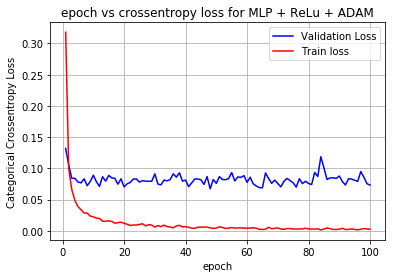

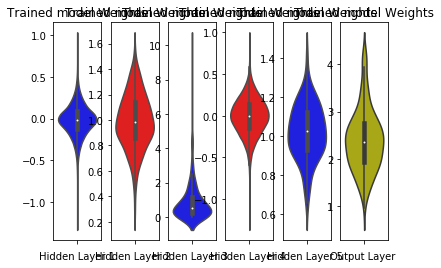

In [29]:
model_with_batch_normalization_5hlayer_acc = mlp5hlayer.model_with_batch_normalization()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 392)               307720    
_________________________________________________________________
batch_normalization_16 (Batc (None, 392)               1568      
_________________________________________________________________
dropout_16 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_17 (Batc (None, 196)               784       
_________________________________________________________________
dropout_17 (Dropout)         (None, 196)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 98)                19306     
__________

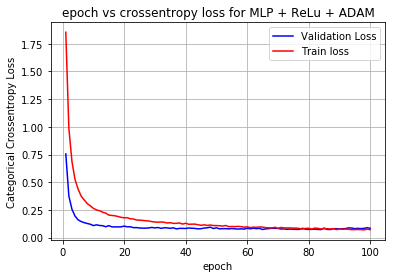

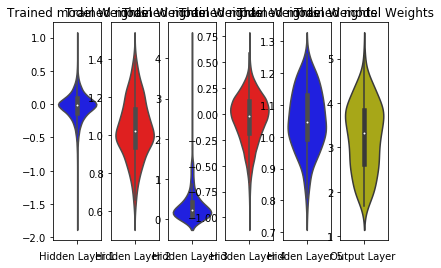

In [30]:
model_with_drop_out_batch_normalization_5hlayer_acc = mlp5hlayer.model_with_drop_out_batch_normalization()

In [31]:
x = PrettyTable()
x.field_names = ["Model", "# hidden layers", "# nodes in hidden layers", "# epochs", "drop out rate", "Accuracy"]
x.add_row(["MLP + ReLu + ADAM",'2','(512, 128)','100','',simple_2hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout",'2','(512, 128)','100','0.5',simple_with_drop_out_2hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Batch Normalization",'2','(512, 128)','100','',simple_with_batch_normalization_2hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout + Batch Normalization",'2','(512, 128)','100','0.5',simple_with_drop_out_batch_normalization_2hlayer_acc])

x.add_row(["MLP + ReLu + ADAM",'3','(392, 196, 98)','100','',model_3hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout",'3','(392, 196, 98)','100','0.5',model_with_drop_out_3hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Batch Normalization",'3','(392, 196, 98)','100','',model_with_batch_normalization_3hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout + Batch Normalization",'3','(392, 196, 98)','100','0.5',model_with_drop_out_batch_normalization_3hlayer_acc])

x.add_row(["MLP + ReLu + ADAM",'5','(392, 196, 98, 49, 24)','100','',model_5hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout",'5','(392, 196, 98, 49, 24)','100','0.5',model_with_drop_out_5hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Batch Normalization",'5','(392, 196, 98, 49, 24)','100','',model_with_batch_normalization_5hlayer_acc])
x.add_row(["MLP + ReLu + ADAM + Dropout + Batch Normalization",'5','(392, 196, 98, 49, 24)','100','0.5',model_with_drop_out_batch_normalization_5hlayer_acc])
print(x)

+---------------------------------------------------+-----------------+--------------------------+----------+---------------+----------+
|                       Model                       | # hidden layers | # nodes in hidden layers | # epochs | drop out rate | Accuracy |
+---------------------------------------------------+-----------------+--------------------------+----------+---------------+----------+
|                 MLP + ReLu + ADAM                 |        2        |        (512, 128)        |   100    |               |   98.6   |
|            MLP + ReLu + ADAM + Dropout            |        2        |        (512, 128)        |   100    |      0.5      |   98.5   |
|      MLP + ReLu + ADAM + Batch Normalization      |        2        |        (512, 128)        |   100    |               |  98.51   |
| MLP + ReLu + ADAM + Dropout + Batch Normalization |        2        |        (512, 128)        |   100    |      0.5      |  98.59   |
|                 MLP + ReLu + ADAM      